Dans la plupart des cas, les variables que nous utilisons pour représenter nos données correspondent à un nombre assez grand de quantités que l'on peut facilement mesurer sur ces données. Par exemple, on représente une image par les valeurs RGB de chacun de ses pixels ; ou les goûts d'un client par l'ensemble des produits qu'il a achetés.

Cependant, le phénomène que l'on cherche à expliquer pourrait souvent être prédit à partir d'un plus petit nombre de variables, mais qui sont elles plus difficiles à mesurer. Par exemple, plutôt que l'ensemble de ses transactions, une seule variable qui décrit si un client est végétarien ou non serait certainement très informative pour décider s'il faut lui proposer des bons de réduction pour le rayon charcuterie.

La description « accessible » que nous avons de notre client, à savoir la liste de ses achats, est une fonction de cette variable (végétarien ou non) qui nous est cachée. On parle aussi souvent de variable latente. On peut considérer que le but de la réduction de dimension est de retrouver les variables cachées qui décrivent au mieux nos données, à partir des variables observées qui nous sont accessibles.



In [ ]:
# transformer les données en array numpy
X = my_data.values

In [ ]:
#Rappelez-vous : nous avons fait l'hypothèse que les données étaient centrées. Nous allons donc commencer par les standardiser.


from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

In [ ]:
import matplotlib.pyplot as plt


# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
            # colorer en utilisant la variable 'Rank'
            c=data.Rank)

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

Pour mieux comprendre ce que capturent ces composantes principales, nous pouvons utiliser pca.components_  , qui nous donne les coordonnées des composantes principales dans l'espace initial (celui à 10 variables). Nous allons afficher, pour chacune des 10 performances, un point dont l'abscisse sera sa contribution à la première PC, et l'ordonnée sa contribution à la deuxième PC.



In [ ]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

La descente de gradient est une méthode de minimisation applicable aux fonctions différentiables. Le gradient indique en effet la direction de plus forte pente de la fonction ; si on suit la direction opposée au gradient, la fonction va donc décroître. L'algorithme de descente de gradient consiste à choisir un point au hasard, y évaluer le gradient de la fonction à minimiser, se déplacer dans la direction opposée à ce gradient, et réitérer jusqu'à ce que le gradient soit (à peu près) nul et la fonction donc localement minimale. Attention : si le problème n'est pas convexe, le minimum atteint par cet algorithme peut ne pas être global (d'où le « localement » dans la phrase précédente).  Encore une fois, Wikipedia vous permettra de compléter vos connaissances sur le sujet !

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

L'ACP cherche à maximiser la variance de X selon des directions orthogonales.

L'analyse factorielle cherche à modéliser la structure de la covariance des variables observées, et ne définit pas nécessairement des axes orthogonaux.

La NMF (factorisation non négative de matrice) s'applique à des matrices X dont les entrées sont toutes positives, et force les entrées de W et de H à être positives aussi. Elle permet aussi de prédire les valeurs manquantes de X.

NMF : pour syst de recommandation (quand on a des variables manquantes)

In [2]:
import numpy as np
X = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [0.5, 0.5], [1.5, 1.5], [2.5, 2.5]])
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca.fit(X)
print(pca.components_)

[[-0.70710678 -0.70710678]]


t-SNE : visualisation de données non linéaires

Comme l’algorithme du t-SNE est une recherche de minimum local (pas global), on peut tomber facilement sur des résultats assez différents si on exécute plusieurs fois l’algorithme.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\oumei\scikit_learn_data


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


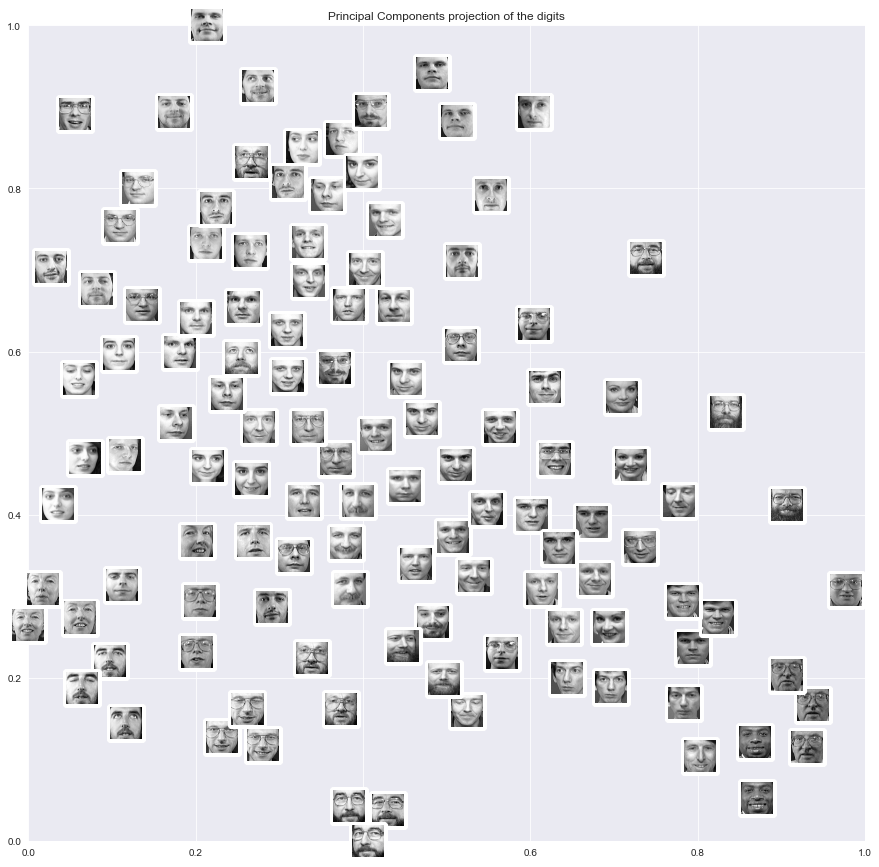

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox

olivetti = fetch_olivetti_faces()
targets = olivetti.target
data = olivetti.data
images = olivetti.images

# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.5), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)


X = data
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=3000, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()

K MEANS

In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\oumei\Documents\OC_projets\P5\P5_Data_Science_OpenClassrooms\other_documents\seeds_dataset.txt", delim_whitespace=True, header=None)

In [2]:
data

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
X = data.drop(7, axis=1).values
Y = data[7].values
print(X.shape)
print(Y.shape)

(210, 7)
(210,)


In [4]:
from sklearn import preprocessing
X_norm = preprocessing.scale(X)
print(X_norm.shape)

X_norm

(210, 7)


array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

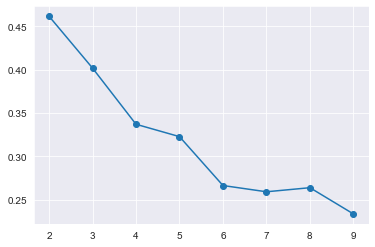

In [13]:
%pylab inline
from sklearn import cluster, metrics
silhouettes = []
for num_clusters in range(2, 10):
    cls = cluster.KMeans(n_clusters=num_clusters, init='random', n_init=1)
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')

In [7]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm)

[0.71874303 0.88982486]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


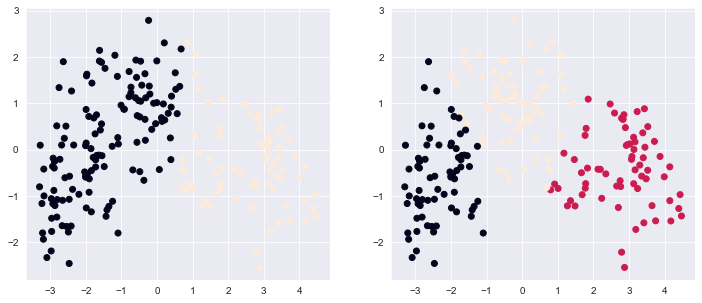

In [9]:
fig = plt.figure(figsize=(12, 5))

cls = cluster.KMeans(n_clusters=2)
cls.fit(X_norm)
ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls.labels_) # colorier en fct etiquette deu clusterning


cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_norm)
ax = fig.add_subplot(122) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls3.labels_) # colorier en fct etiquette deu clusterning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


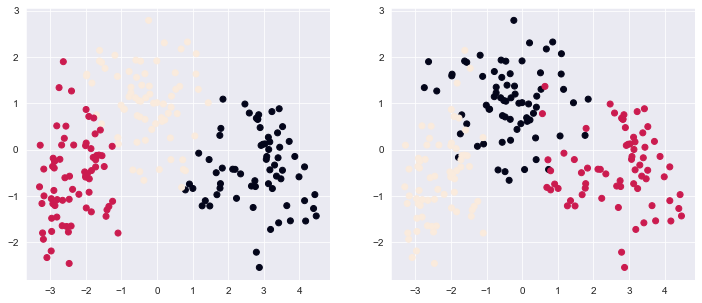

In [10]:
fig = plt.figure(figsize=(12, 5))

cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_norm)
ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls3.labels_) # colorier en fct etiquette deu clusterning


ax = fig.add_subplot(122) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=Y) # colorier en fct vraies etiquettes

In [11]:
print(metrics.adjusted_rand_score(Y, cls3.labels_)) # Y true labels / pred labels

0.7732937360806309
